In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
data_path = os.getcwd()+"/data"
list_of_csv = [f for f in os.listdir(data_path) if os.path.isfile(os.path.join(data_path, f))]
# list_of_csv
interger = 1

Likely hood of winning the race 
- based on qualifying times
- based on fastest lap times 

show case stats
- per race
- per year

Chances of being the champion of the season


In [4]:
circuits = pd.read_csv('data/circuits.csv')
constructors = pd.read_csv('data/constructors.csv')
constructor_results = pd.read_csv('data/constructor_results.csv')
constructor_standings = pd.read_csv('data/constructor_standings.csv')
drivers = pd.read_csv('data/drivers.csv')
driver_standings = pd.read_csv('data/driver_standings.csv')
lap_times = pd.read_csv('data/lap_times.csv')
pit_stops = pd.read_csv('data/pit_stops.csv')
qualifying = pd.read_csv('data/qualifying.csv')
races = pd.read_csv('data/races.csv')
results = pd.read_csv('data/results.csv')
seasons = pd.read_csv('data/seasons.csv')
status = pd.read_csv('data/status.csv')

In [5]:
# races.head()
# results.head()
# pit_stops.head()
# status.head()
# lap_times.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [6]:
constructor_df = pd.merge(constructors,constructor_results, on = 'constructorId')
constructor_df = constructor_df.merge(constructor_standings, how= 'left', on= ['constructorId','raceId'], suffixes= ['_results','_standings'])
constructor_df = constructor_df.merge(races, how= 'left', on= ['raceId'], suffixes= ['_constructors','_race'])
constructor_df = constructor_df.merge(circuits, how= 'left', on= ['circuitId'], suffixes= ['_constructors','_circuit'])
constructor_df.to_csv('data/constructor_complete.csv', index = False)
constructor_df.head()
# Joined constructor data set
# constructors, constructor_results, constructor_standings, races

,constructorId,constructorRef,name_constructors,nationality,url_constructors,constructorResultsId,raceId,points_results,status,constructorStandingsId,...,time,url_race,circuitRef,name,location,country,lat,lng,alt,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,1,18,14.0,\N,1.0,...,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,14,19,10.0,\N,7.0,...,07:00:00,http://en.wikipedia.org/wiki/2008_Malaysian_Gr...,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,25,20,4.0,\N,18.0,...,11:30:00,http://en.wikipedia.org/wiki/2008_Bahrain_Gran...,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,35,21,6.0,\N,29.0,...,12:00:00,http://en.wikipedia.org/wiki/2008_Spanish_Gran...,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,46,22,8.0,\N,40.0,...,12:00:00,http://en.wikipedia.org/wiki/2008_Turkish_Gran...,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [7]:
races_df = pd.merge(races,circuits, how= 'left', on = 'circuitId', suffixes= ['_races','_circuits'])
races_df = races_df.merge(results, how= 'left', on= 'raceId', suffixes= ['_results','_races'])
races_df = races_df.merge(drivers, how= 'left', on= 'driverId', suffixes= ['_races','_driver'])
races_df = races_df.merge(qualifying, how= 'left', on= ['raceId','driverId'], suffixes= ['_races','_qualifying'])
races_df.head()
# Joined constructor data set
# races, circuits, results, drivers, qualifying

,raceId,year,round,circuitId,name_races,date,time_results,url_races,circuitRef,name_circuits,...,dob,nationality,url,qualifyId,constructorId_qualifying,number,position_qualifying,q1,q2,q3
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,albert_park,Albert Park Grand Prix Circuit,...,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button,2986.0,23.0,22.0,1.0,1:25.211,1:24.855,1:26.202
1,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,albert_park,Albert Park Grand Prix Circuit,...,1972-05-23,Brazilian,http://en.wikipedia.org/wiki/Rubens_Barrichello,2987.0,23.0,23.0,2.0,1:25.006,1:24.783,1:26.505
2,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,albert_park,Albert Park Grand Prix Circuit,...,1974-07-13,Italian,http://en.wikipedia.org/wiki/Jarno_Trulli,2993.0,7.0,9.0,8.0,1:26.194,1:25.265,1:27.127
3,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,albert_park,Albert Park Grand Prix Circuit,...,1982-03-18,German,http://en.wikipedia.org/wiki/Timo_Glock,2991.0,7.0,10.0,6.0,1:25.499,1:25.281,1:26.975
4,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,albert_park,Albert Park Grand Prix Circuit,...,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,2997.0,4.0,7.0,12.0,1:26.026,1:25.605,\N


In [8]:
results_status = pd.merge(results,races, on = 'raceId', suffixes= ['_results','_races'])
results_status = results_status.merge(status, on= 'statusId', suffixes= ['_results','_status'])
results_status = results_status.merge(pit_stops, on= ['raceId','driverId'], suffixes= ['_results', '_pitstop'])
results_status = results_status.merge(lap_times, on= ['raceId','driverId'], suffixes= ['_results', '_laps'])
results_status.head()

# Joined constructor data set
# results, races, status, pit_stops, lap_times

C:\Users\TIMEGN~1\AppData\Local\Temp/ipykernel_27980/1180473031.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'time_races'} in the result is deprecated and will raise a MergeError in a future version.
  results_status = results_status.merge(lap_times, on= ['raceId','driverId'], suffixes= ['_races', '_laps'])


,resultId,raceId,driverId,constructorId,number,grid,position_races,positionText,positionOrder,points,...,status,stop,lap_races,time_races,duration,milliseconds_pitstop,lap_laps,position_laps,time_laps,milliseconds
0,20779,841,20,9,1,1,1,1,1,25.0,...,Finished,1,14,17:25:17,22.603,22603,1,1,1:38.109,98109
1,20779,841,20,9,1,1,1,1,1,25.0,...,Finished,1,14,17:25:17,22.603,22603,2,1,1:33.006,93006
2,20779,841,20,9,1,1,1,1,1,25.0,...,Finished,1,14,17:25:17,22.603,22603,3,1,1:32.713,92713
3,20779,841,20,9,1,1,1,1,1,25.0,...,Finished,1,14,17:25:17,22.603,22603,4,1,1:32.803,92803
4,20779,841,20,9,1,1,1,1,1,25.0,...,Finished,1,14,17:25:17,22.603,22603,5,1,1:32.342,92342


In [9]:
constructor_df.describe()

,constructorId,constructorResultsId,raceId,points_results,constructorStandingsId,points_standings,position,wins,year,round,circuitId,lat,lng,alt
count,11820.000000,11820.000000,11820.000000,11820.000000,11683.000000,11683.000000,11683.000000,11683.000000,11820.000000,11820.000000,11820.000000,11820.000000,11820.000000,11820.000000
mean,42.640186,7858.448731,488.991963,3.592851,15620.857656,33.244543,6.959343,0.710263,1992.336379,8.573266,21.626311,33.440761,7.120223,281.657614
std,55.355378,5409.810943,285.811661,7.098910,8865.273873,72.977431,4.211695,1.825560,16.318760,4.890886,16.164415,25.808110,58.003197,413.224890
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1956.000000,1.000000,1.000000,-37.849700,-118.189000,-7.000000
25%,6.000000,2955.750000,272.000000,0.000000,8252.500000,0.000000,4.000000,0.000000,1980.000000,4.000000,9.000000,34.843100,-1.016940,18.000000
50%,22.000000,5910.500000,462.000000,0.000000,17809.000000,8.000000,7.000000,0.000000,1991.000000,8.000000,18.000000,43.734700,6.947500,145.000000
75%,51.000000,13331.250000,684.000000,4.000000,24268.500000,32.000000,10.000000,0.000000,2006.000000,12.000000,32.000000,47.578900,14.764700,401.000000
max,214.000000,16319.000000,1060.000000,66.000000,27792.000000,765.000000,21.000000,19.000000,2021.000000,21.000000,76.000000,57.265300,144.968000,2227.000000


In [10]:
races_df.describe()

,raceId,year,round,circuitId,lat,lng,alt,resultId,driverId,constructorId_races,grid,positionOrder,points,laps,statusId,qualifyId,constructorId_qualifying,number,position_qualifying
count,25154.000000,25154.000000,25154.000000,25154.000000,25154.000000,25154.000000,25154.000000,25140.000000,25140.000000,25140.000000,25140.000000,25140.000000,25140.000000,25140.000000,25140.000000,8873.000000,8873.000000,8873.000000,8873.000000
mean,516.521627,1989.395722,8.257335,22.077920,34.156399,5.495666,277.741671,12571.218337,249.500438,47.323230,11.211734,12.942164,1.789521,45.804455,17.757399,4444.847064,39.415756,17.179646,11.321537
std,289.377413,18.890447,4.864748,16.622879,25.409658,57.049753,402.492524,7258.469117,256.875639,58.208313,7.275871,7.749181,4.018738,30.036217,26.122051,2570.685684,66.540451,16.882730,6.337371
min,1.000000,1950.000000,1.000000,1.000000,-37.849700,-118.189000,-7.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,287.000000,1976.000000,4.000000,9.000000,34.843100,-1.016940,18.000000,6285.750000,56.000000,6.000000,5.000000,6.000000,0.000000,21.000000,1.000000,2220.000000,4.000000,7.000000,6.000000
50%,501.000000,1990.000000,8.000000,18.000000,44.048100,5.971390,153.000000,12570.500000,158.000000,25.000000,11.000000,12.000000,0.000000,52.000000,11.000000,4438.000000,9.000000,14.000000,11.000000
75%,759.000000,2006.000000,12.000000,32.000000,49.254200,13.604200,401.000000,18855.250000,347.000000,57.000000,17.000000,19.000000,2.000000,66.000000,15.000000,6677.000000,22.000000,21.000000,17.000000
max,1073.000000,2021.000000,23.000000,77.000000,57.265300,144.968000,2227.000000,25145.000000,854.000000,214.000000,34.000000,39.000000,50.000000,200.000000,139.000000,8913.000000,214.000000,99.000000,28.000000


In [11]:
results_status.describe()

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId,year,round,circuitId,stop,lap_races,milliseconds_pitstop,lap_laps,position_laps,milliseconds
count,481431.000000,481431.000000,481431.000000,481431.000000,481431.000000,481431.000000,481431.000000,481431.000000,481431.000000,481431.000000,481431.000000,481431.000000,481431.000000,481431.000000,4.814310e+05,481431.000000,481431.000000,4.814310e+05
mean,22807.629168,938.447383,483.544452,63.092759,11.008772,10.254927,5.190615,59.692166,7.168244,2015.223826,9.844592,20.636687,1.781466,26.093291,5.729978e+04,30.350939,10.390455,1.017574e+05
std,1277.819744,65.243261,395.420352,83.294499,6.330587,5.680198,7.244562,9.690687,13.186176,3.050307,5.706337,21.974634,0.930070,14.634619,2.187730e+05,18.116783,5.789868,1.193239e+05
min,20779.000000,841.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2011.000000,1.000000,1.000000,1.000000,1.000000,1.289700e+04,1.000000,1.000000,5.540400e+04
25%,21726.000000,880.000000,17.000000,5.000000,5.000000,5.000000,0.000000,54.000000,1.000000,2013.000000,5.000000,6.000000,1.000000,14.000000,2.184900e+04,15.000000,5.000000,8.488500e+04
50%,22730.000000,936.000000,813.000000,9.000000,11.000000,10.000000,1.000000,58.000000,1.000000,2015.000000,10.000000,13.000000,2.000000,26.000000,2.336700e+04,30.000000,10.000000,9.676200e+04
75%,23840.000000,991.000000,826.000000,131.000000,16.000000,15.000000,10.000000,68.000000,11.000000,2018.000000,15.000000,22.000000,2.000000,37.000000,2.566000e+04,45.000000,15.000000,1.065380e+05
max,25144.000000,1060.000000,854.000000,214.000000,24.000000,24.000000,50.000000,87.000000,139.000000,2021.000000,21.000000,76.000000,6.000000,78.000000,2.048175e+06,87.000000,24.000000,7.507547e+06


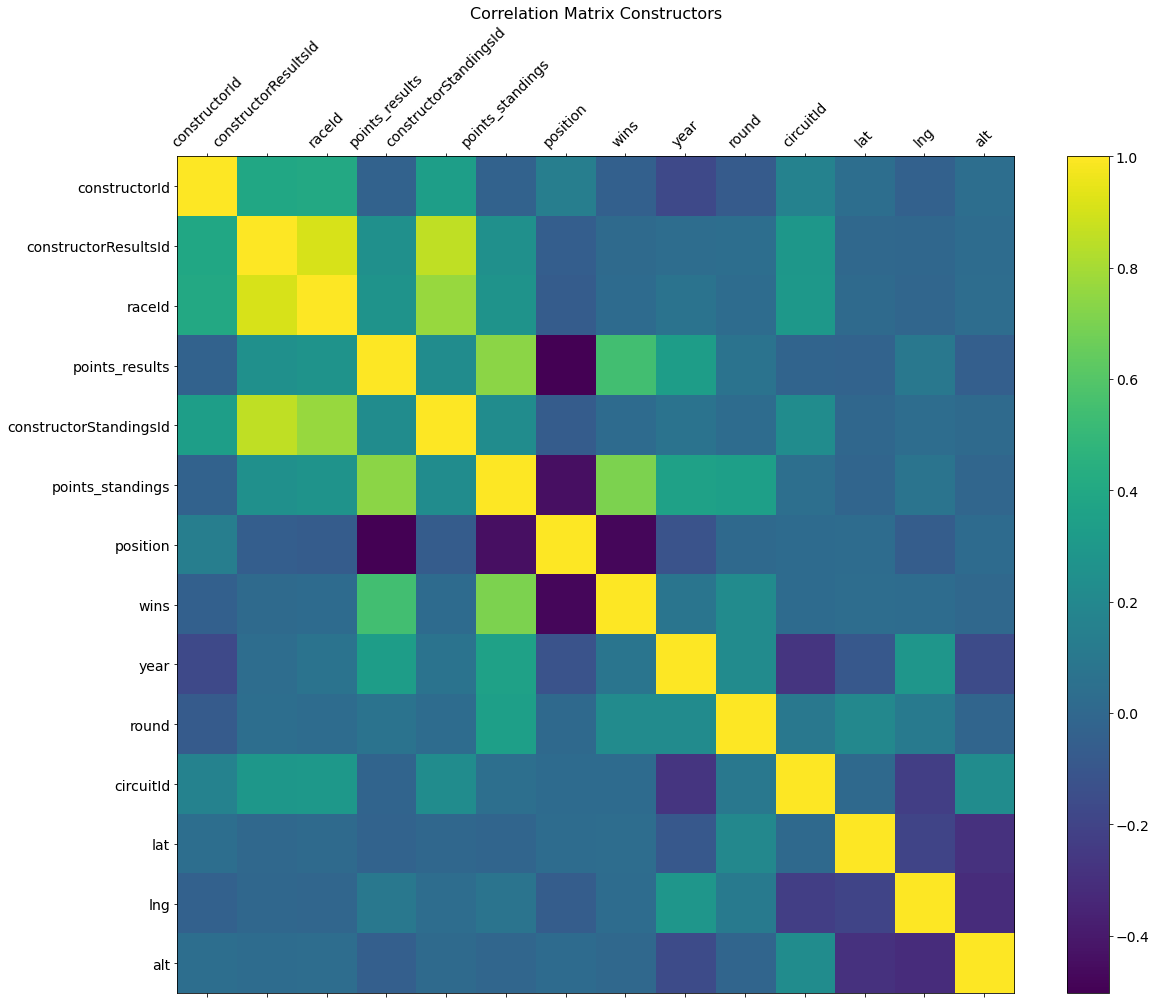

In [12]:
f = plt.figure(figsize=(19, 15))
plt.matshow(constructor_df.corr(),fignum=f.number)
plt.xticks(range(constructor_df.select_dtypes(['number']).shape[1]), constructor_df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(constructor_df.select_dtypes(['number']).shape[1]), constructor_df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix Constructors', fontsize=16);
plt.show()

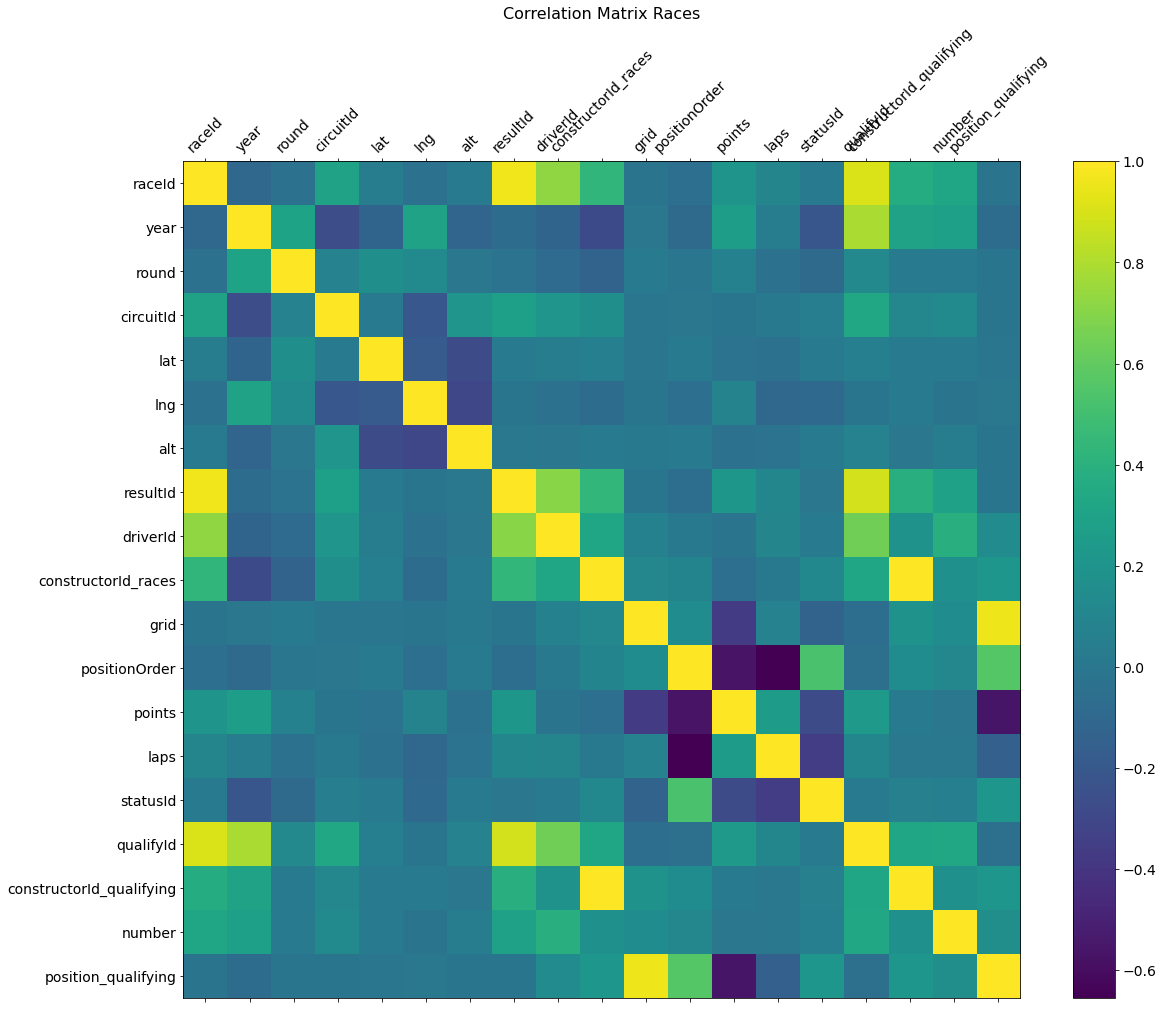

In [13]:
s = plt.figure(figsize=(19, 15))
plt.matshow(races_df.corr(),fignum=s.number)
plt.xticks(range(races_df.select_dtypes(['number']).shape[1]), races_df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(races_df.select_dtypes(['number']).shape[1]), races_df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix Races', fontsize=16);
plt.show()

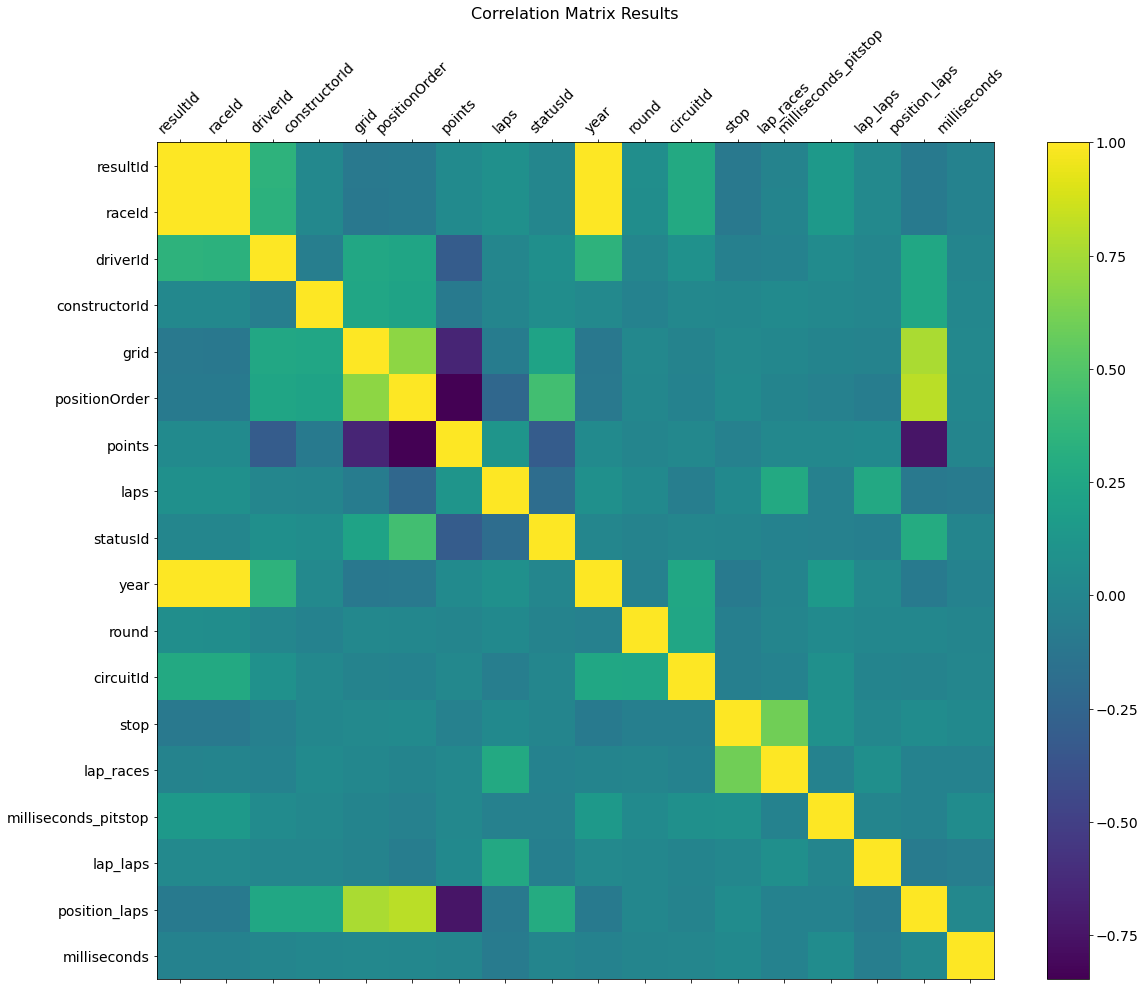

In [14]:
d = plt.figure(figsize=(19, 15))
plt.matshow(results_status.corr(),fignum=d.number)
plt.xticks(range(results_status.select_dtypes(['number']).shape[1]), results_status.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(results_status.select_dtypes(['number']).shape[1]), results_status.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix Results', fontsize=16);
plt.show()

In [16]:
constructor_df.columns

Index(['constructorId', 'constructorRef', 'name_constructors', 'nationality',
       'url_constructors', 'constructorResultsId', 'raceId', 'points_results',
       'status', 'constructorStandingsId', 'points_standings', 'position',
       'positionText', 'wins', 'year', 'round', 'circuitId', 'name_race',
       'date', 'time', 'url_race', 'circuitRef', 'name', 'location', 'country',
       'lat', 'lng', 'alt', 'url'],
      dtype='object')

In [17]:
races_df.columns

Index(['raceId', 'year', 'round', 'circuitId', 'name_races', 'date',
       'time_results', 'url_races', 'circuitRef', 'name_circuits', 'location',
       'country', 'lat', 'lng', 'alt', 'url_circuits', 'resultId', 'driverId',
       'constructorId_races', 'number_races', 'grid', 'position_races',
       'positionText', 'positionOrder', 'points', 'laps', 'time_races',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'driverRef', 'number_driver', 'code',
       'forename', 'surname', 'dob', 'nationality', 'url', 'qualifyId',
       'constructorId_qualifying', 'number', 'position_qualifying', 'q1', 'q2',
       'q3'],
      dtype='object')

In [18]:
results_status.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position_races', 'positionText', 'positionOrder', 'points', 'laps',
       'time_results', 'milliseconds_races', 'fastestLap', 'rank',
       'fastestLapTime', 'fastestLapSpeed', 'statusId', 'year', 'round',
       'circuitId', 'name', 'date', 'time_races', 'url', 'status', 'stop',
       'lap_races', 'time_races', 'duration', 'milliseconds_pitstop',
       'lap_laps', 'position_laps', 'time_laps', 'milliseconds'],
      dtype='object')

In [19]:
# JupyterDash.infer_jupyter_proxy_config()
from dash import Dash, dcc, html, Input, Output
import plotly.express as px